<a href="https://colab.research.google.com/github/FernandoNunezSaravia/Examen-Final/blob/main/Examen_Final_Python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Alumno: Fernando Martin Nuñez Saravia

#Problema 1

In [ ]:
"""
Establezca 2 modelos de clasificación para el data Iris
"""
# Importamos las librerías necesarias
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import multilabel_confusion_matrix

# Configuramos la matrix 'X' y el vector 'y'
df_iris = datasets.load_iris()
X = df_iris.data
y = df_iris.target

# Verificamos la dimensionalidad vectorial de la data
print(np.shape(X))
print(np.shape(y))
y = np.reshape(y,(150,1))
print(np.shape(y))

# Dividimos la data en Train y Test
Xtrain,Xtest,ytrain,ytest = tts(X,y)

print ("-------------------------------------------------------------------------")

##### MODELO SUPPORT VECTOR MACHINE (SVM)

# Creamos el modelo
svcmodel = SVC(gamma = 'scale')

# Entrenamos la data
svcmodel.fit(Xtrain,ytrain)

# Validamos resultados
ypredict_svc = svcmodel.predict(Xtest)
matriz_svc = multilabel_confusion_matrix(ytest,ypredict_svc)
print("La matriz de confusión con el modelo SVM es:")
print(matriz_svc)

##### MODELO RANDOM FOREST (RF)

# Creamos el modelo
rfmodel = RandomForestClassifier(n_estimators = 100,random_state = 42)

# Entrenamos la data
rfmodel.fit(Xtrain,ytrain)

# Validamos resultados
ypredict_rf = rfmodel.predict(Xtest)
matriz_rf = multilabel_confusion_matrix(ytest,ypredict_rf)
print("La matriz de confusión con el modelo RF es:")
print(matriz_rf)

(150, 4)
(150,)
(150, 1)
-------------------------------------------------------------------------
La matriz de confusión con el modelo SVM es:
[[[26  0]
  [ 0 12]]

 [[21  3]
  [ 0 14]]

 [[26  0]
  [ 3  9]]]
La matriz de confusión con el modelo RF es:
[[[26  0]
  [ 0 12]]

 [[20  4]
  [ 0 14]]

 [[26  0]
  [ 4  8]]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#Problema 2

In [ ]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import pandas as pd 

df_melbournhouses = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
df_melbournhouses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#Problema 3

In [ ]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

# Establecemos el dataframe
df_wine = pd.read_excel("/content/Examen Final - Wine.xlsx")
display(df_wine.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
# Primero transfomaremos las variables categóricas en variables numéricas pues no hay suficientes variables numéricas para elaborar un modelo de regresión
encoder = LabelEncoder()
encode_x1 = encoder.fit_transform(df_wine['province'])
print(encode_x1[0:10])
encode_x2 = encoder.fit_transform(df_wine['region_1'])
print(encode_x2[0:10])
"""
Parecía que había un error con los valores de la columna 'price' pues a la hora de entrenar la data me salía
'ValueError: Input contains NotaNumber, infinity or a value too large for dtype('float64')' por eso decidí aplicarle el
Label Encoder también y finalmente funcionó (no tiene un r2 tan bueno, pero lo considero adecuado)
"""
encode_y1 = encoder.fit_transform(df_wine['price'])
print(encode_y1[0:10])

# Ahora sí configuramos la matrix 'X' y el vector 'y'
X = np.c_[encode_x1,encode_x2]
y = np.array(encode_y1)

[ 51 274  51 282 313 274 274 274 282  51]
[ 738 1070  528 1222   66 1070 1070 1070  204 1000]
[216 106  86  61  62  69  61 106  61  56]


In [ ]:
# Verificamos la dimensionalidad vectorial de la data
print(np.shape(X))
print(np.shape(y))
y = np.reshape(y,(len(y),1))
print(np.shape(y))

# Dividimos la data en Train y Test
Xtrain,Xtest,ytrain,ytest = tts(X,y)

# Creamos el modelo
modeloRF = RandomForestRegressor(n_estimators = 200,random_state = 42)

# Entrenamos la data
modeloRF.fit(Xtrain,ytrain)

# Evaluamos si existe sobreajuste, subajuste o el modelo está generalizado (comparamos resultados de validación y de entrenamiento)
ypred_test = modeloRF.predict(Xtest)
r2_test = r2_score(ytest,ypred_test)
print("R2 de validación:",r2_test)

print("------------------------------------------------------------------")

ypred_train = modeloRF.predict(Xtrain)
r2_train = r2_score(ytrain,ypred_train)
print("R2 de entrenamiento:",r2_train)

print("------------------------------------------------------------------")

"""
Respuesta: No existe sobreajuste sino mas bien se puede decir que el modelo está generalizado ya que el valor del r2 de
validación se asemeja al valor del r2 de entrenamiento (lo cual es bueno)
"""

(150930, 2)
(150930,)
(150930, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 de validación: 0.3110522724974971
------------------------------------------------------------------
R2 de entrenamiento: 0.32641952288684106
------------------------------------------------------------------


'\nRespuesta: No existe sobreajuste sino mas bien se puede decir que el modelo está generalizado ya que el valor del r2 de\nvalidación se asemeja al valor del r2 de entrenamiento (lo cual es bueno)\n'

#Problema 4


In [ ]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler

# Definimos la ruta
breastdf = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv")
display(breastdf.head())
dfX = breastdf.drop(columns = ['id','diagnosis'])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Transformamos la variable 'diagnosis' a una variable numérica pues como variable nominal no es posible crear el modelo
Encoder = LabelEncoder()
y = Encoder.fit_transform(breastdf['diagnosis'])

# Verificamos la dimensionalidad vectorial de la data
y = np.reshape(y,(len(y),1))
print(y[:4])
print(np.shape(y))

print("-----------------------------------------------------------------")

# Escalamos la data para un mejor resultado
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
print(X[0:4,:])

print("-----------------------------------------------------------------")

# Dividimos la data en evaluación y entrenamiento
Xtrain,Xtest,ytrain,ytest = tts(X,y)

# Creamos el modelo de clasificación de Deep Learning (primero la secuencia y luego la compilación)
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

historico = ModeloClasificador.fit(Xtrain,ytrain,epochs = 700)

[[1]
 [1]
 [1]
 [1]]
(569, 1)
-----------------------------------------------------------------
[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700

-----------------------------------------------------------------


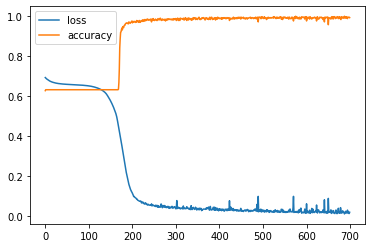

In [ ]:
print("-----------------------------------------------------------------")

# Graficamos la función de costo
pd.DataFrame(historico.history).plot()

#Problema 5

In [ ]:
"""
Crea una función que aplane la ruta de una imágen
"""

import matplotlib.pyplot as plt
import numpy as np

def AplanarImagen():
  images = []
  decision = input("Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: ")
  while decision == 'I':
    ruta = input("Ingrese la ruta de su imagen: ")
    images.append(plt.imread(ruta))
    for image in images:
      vector = image.flatten()
      print(np.shape(vector))
    decision = input("Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: ")
  print("Saliendo del programa")

AplanarImagen()

Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: I
Ingrese la ruta de su imagen: /content/gato.jpg
(3686400,)
Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: I
Ingrese la ruta de su imagen: /content/gatos-gestos-m.jpg
(3686400,)
(750000,)
Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: I
Ingrese la ruta de su imagen: /content/gato-marron_0.jpg
(3686400,)
(750000,)
(2924100,)
Escribe 'I' para ingresar la ruta de su imagen o cualquier otro comando para cerrar el programa: X
Saliendo del programa
